In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/DatabaseProject/ComparativeAnalysis

/content/drive/.shortcut-targets-by-id/1iKIyDHjOAd1ilBBi6iudReH2fNIZ5Mk_/DatabaseProject/ComparativeAnalysis


In [3]:
djangoFolder = 'django_outputs'
ponyFolder = 'pony_outputs'
sqlalchemyFolder = 'sqlalchemy_outputs'
peeweeFolder = 'peewee_outputs'
tortoiseFolder = 'tortoise_outputs'
nativeFolder ='native_outputs'

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
def getData(django, pony, sqlalchemy, peewee, tortoise, native = None):
  data_django = pd.read_csv(django) 
  data_django.rename(columns = {'Total time': 'Total Time'}, inplace = True)
  data_django.rename(columns = {'TotalTime': 'Total Time'}, inplace = True)
  data_pony = pd.read_csv(pony)
  data_pony['ORM'] = 'Pony'
  data_pony.rename(columns = {'Total time': 'Total Time'}, inplace = True)
  data_pony.rename(columns = {'TotalTime': 'Total Time'}, inplace = True)
  data_sqlalchemy = pd.read_csv(sqlalchemy)
  data_sqlalchemy.rename(columns = {'Total time': 'Total Time'}, inplace = True)
  data_sqlalchemy.rename(columns = {'TotalTime': 'Total Time'}, inplace = True)
  data_peewee = pd.read_csv(peewee)
  data_peewee['ORM'] = 'Peewee'
  data_peewee.rename(columns = {'Total time': 'Total Time'}, inplace = True)
  data_peewee.rename(columns = {'TotalTime': 'Total Time'}, inplace = True)
  data_tortoise = pd.read_csv(tortoise)
  data_tortoise['ORM'] = 'Tortoise'
  data_tortoise.rename(columns = {'Total time': 'Total Time'}, inplace = True)
  data_tortoise.rename(columns = {'TotalTime': 'Total Time'}, inplace = True)
  cols = ['ORM', 'Rows', 'RowsPerSec', 'Table', 'Testcase', 'Total Time']

  if native:
    data_native = pd.read_csv(native)
    data_native['ORM'] = 'native'
    data_native.rename(columns = {'Total time': 'Total Time'}, inplace = True)
    data_native.rename(columns = {'TotalTime': 'Total Time'}, inplace = True)
    data = pd.concat([data_django, data_pony, data_sqlalchemy, data_peewee, data_tortoise, data_native])
    
  else:
    data = pd.concat([data_django, data_pony, data_sqlalchemy, data_peewee, data_tortoise])
  data['Testcase'] = data['Testcase'].str.lower()
  return data

In [6]:
def plot(data, testcase, col):
  values = {}
  django = data[data['ORM'] == 'Django'][col].to_list()
  values['Django'] = django

  pony = data[data['ORM'] == 'Pony'][col].to_list()
  values['Pony'] = pony

  sqlalchemy = data[data['ORM'] == 'SQLAlchemy'][col].to_list()
  values['SQLAlchemy'] = sqlalchemy

  peewee = data[data['ORM'] == 'Peewee'][col].to_list()
  values['Peewee'] = peewee

  tortoise = data[data['ORM'] == 'Tortoise'][col].to_list()
  values['Tortoise'] = tortoise

  if testcase not in ['test_f', 'test_g', 'test_h']:
    native = data[data['ORM'] == 'native'][col].to_list()
    values['native'] = native

  index = data['Table'].unique()
  df = pd.DataFrame(values, index=index)
  
  plt.figure(figsize=(8,5))
  ax = df.plot.bar(rot=0, title = testcase, xlabel = 'Tables', ylabel = col)
  plt.savefig(f"{testcase}_{col}.png")
  plt.show()

Performance Testcases

<Figure size 576x360 with 0 Axes>

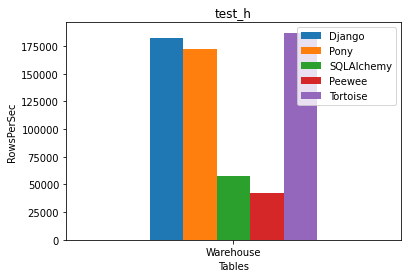

<Figure size 576x360 with 0 Axes>

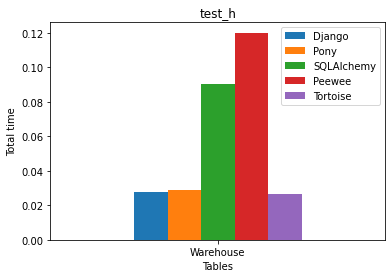

<Figure size 576x360 with 0 Axes>

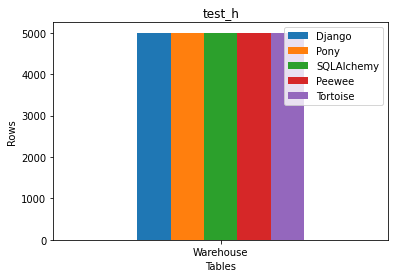

In [9]:
import os

testcases = ['test_h'] #['test_a','test_b','test_d', 'test_e','test_f', 'test_g', 'test_h', 'test_i', 'test_j', 'test_k']

for i in range(len(testcases)):
  filename = testcases[i] + '.csv'
  django = os.path.join(djangoFolder, filename)
  pony = os.path.join(ponyFolder, filename)
  sqlalchemy = os.path.join(sqlalchemyFolder, filename)
  peewee = os.path.join(peeweeFolder, filename)
  tortoise = os.path.join(tortoiseFolder, filename)
  native = os.path.join(nativeFolder, filename)
  try:
      if testcases[i] not in ['test_b','test_f', 'test_g', 'test_h']:
        data = getData(django, pony, sqlalchemy, peewee, tortoise, native)
      else:
        data = getData(django, pony, sqlalchemy, peewee, tortoise)
      data[['ORM', 'Table', 'Rows', 'Total time', 'RowsPerSec']].to_csv(f'{testcases[i]}.csv', index = False)
      plot(data, testcases[i], 'RowsPerSec')
      plot(data, testcases[i], 'Total time')
      plot(data, testcases[i], 'Rows')
  except:
    print("Files not available for testcase: ", testcases[i])

<Figure size 576x360 with 0 Axes>

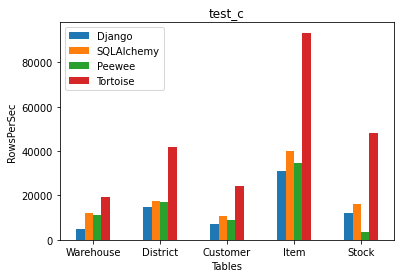

<Figure size 576x360 with 0 Axes>

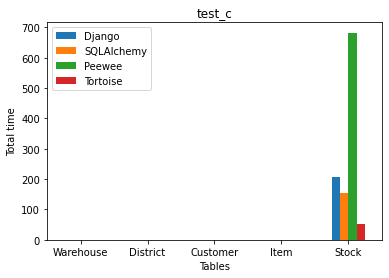

<Figure size 576x360 with 0 Axes>

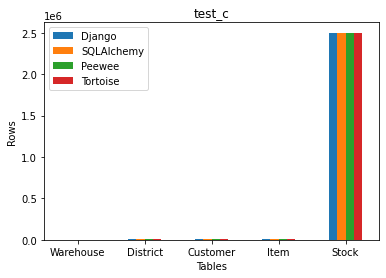

In [ ]:
###Tescase C

import os

testcases = ['test_c']

for i in range(len(testcases)):
  filename = testcases[i] + '.csv'
  django = os.path.join(djangoFolder, filename)
  #pony = os.path.join(ponyFolder, filename)
  sqlalchemy = os.path.join(sqlalchemyFolder, filename)
  peewee = os.path.join(peeweeFolder, filename)
  tortoise = os.path.join(tortoiseFolder, filename)

  data_django = pd.read_csv(django) 
  data_django.rename(columns = {'Total Time': 'Total time'}, inplace = True)
  data_django.rename(columns = {'TotalTime': 'Total time'}, inplace = True)
  data_django.replace('Items', 'Item', inplace = True)
  data_django.replace('Customers', 'Customer', inplace = True)
  data_sqlalchemy = pd.read_csv(sqlalchemy)
  data_peewee = pd.read_csv(peewee)
  data_peewee['ORM'] = 'Peewee'
  data_tortoise = pd.read_csv(tortoise)
  data_tortoise['ORM'] = 'Tortoise'
  data_tortoise.rename(columns = {'TotalTime': 'Total time'}, inplace = True)
  data_tortoise.replace('Items', 'Item', inplace = True)
  data_tortoise.replace('Customers', 'Customer', inplace = True)

  cols = ['ORM', 'Rows', 'RowsPerSec', 'Table', 'Testcase', 'Total time']
  data = pd.concat([data_django, data_sqlalchemy, data_peewee, data_tortoise])
  data['Testcase'] = data['Testcase'].str.lower()
  data[['ORM', 'Table', 'Rows', 'Total time', 'RowsPerSec']].to_csv(f'{testcases[i]}.csv', index = False)

  for col in ['RowsPerSec', 'Total time','Rows' ]:
    values = {}
    django = data[data['ORM'] == 'Django'][col].to_list()
    values['Django'] = django

    sqlalchemy = data[data['ORM'] == 'SQLAlchemy'][col].to_list()
    values['SQLAlchemy'] = sqlalchemy

    peewee = data[data['ORM'] == 'Peewee'][col].to_list()
    values['Peewee'] = peewee

    tortoise = data[data['ORM'] == 'Tortoise'][col].to_list()
    values['Tortoise'] = tortoise

    index = data['Table'].unique()

    df = pd.DataFrame(values, index=index)
    
    plt.figure(figsize=(8,5))
    ax = df.plot.bar(rot=0, title = testcases[i], xlabel = 'Tables', ylabel = col)
    plt.savefig(f"{testcases[i]}_{col}.png")
    plt.show()

In [ ]:
data

,Unnamed: 0,Table,Rows,Total time,RowsPerSec,ORM,Testcase
0,0,Warehouse,500,0.101304,4935.636620,Django,c
1,1,District,5000,0.342662,14591.634319,Django,c
2,2,Customer,5000,0.703540,7106.915575,Django,c
3,3,Item,5000,0.162355,30796.721129,Django,c
4,4,Stock,2500000,206.692812,12095.244030,Django,c
0,0,Warehouse,500,0.040000,12174.690000,SQLAlchemy,c
1,1,District,5000,0.290000,17378.660000,SQLAlchemy,c
2,2,Customer,5000,0.470000,10727.720000,SQLAlchemy,c
3,3,Item,5000,0.130000,39861.250000,SQLAlchemy,c
4,4,Stock,2500000,153.230000,16315.690000,SQLAlchemy,c


Queries Performance

In [22]:
import os
import numpy as np

pony_1 = 'test_Query1.csv'
pony_2 = 'test_Query2.csv'
pony_3 = 'test_Query3.csv'
django_filename = 'DjangoTestcaseQueries.csv'
sqlalchemy_filename = 'test_queries.csv'
tortoise_filename = 'TortoiseTestcaseQueries.csv'
peewee_filename ='test_queries.csv'
pony_filename = 'test_queries.csv'
native_filename = 'test_queries.csv'

django = os.path.join(djangoFolder, django_filename)
pony1 = pd.read_csv(os.path.join(ponyFolder, pony_1))
pony1['Table'] = pony1['Testcase'].str.replace(' ', '')
pony1['Testcase'] = 'Queries'
pony2 = pd.read_csv(os.path.join(ponyFolder, pony_2))
pony2['Table'] = 'Query3' #pony2['Testcase'].str.replace(' ', '')
pony2['Testcase'] = 'Queries'
pony3 = pd.read_csv(os.path.join(ponyFolder, pony_3))
pony3['Table'] = 'Query2' #pony3['Testcase'].str.replace(' ', '')
pony3['Testcase'] = 'Queries'
pony = pd.concat([pony1, pony3, pony2])
pony.to_csv(os.path.join(ponyFolder, 'test_queries.csv'), index = False)
pony = os.path.join(ponyFolder, pony_filename)
sqlalchemy = os.path.join(sqlalchemyFolder, sqlalchemy_filename)
peewee = os.path.join(peeweeFolder, peewee_filename)
tortoise = os.path.join(tortoiseFolder, tortoise_filename)
native = os.path.join(nativeFolder, native_filename)
try:
  data = getData(django, pony, sqlalchemy, peewee, tortoise,native)
  # plot(data[data['Table'] == 'Query1'], 'Queries', 'RowsPerSec')
  # plot(data[data['Table'] == 'Query1'], 'Queries', 'Total time')
  # plot(data[data['Table'] == 'Query1'], 'Queries', 'Rows')
  # plot(data[data['Table'] == 'Query2'], 'Queries', 'RowsPerSec')
  # plot(data[data['Table'] == 'Query2'], 'Queries', 'Total time')
  # plot(data[data['Table'] == 'Query2'], 'Queries', 'Rows')
  # plot(data[data['Table'] == 'Query3'], 'Queries', 'RowsPerSec')
  # plot(data[data['Table'] == 'Query3'], 'Queries', 'Total time')
  # plot(data[data['Table'] == 'Query3'], 'Queries', 'Rows')

  # plt.bar(data[data['Table'] == 'Query1']['ORM'],data[data['Table'] == 'Query1']['RowsPerSec'])
  # #plt.stem(np.array([1,2,3,4,11,1500]), np.array([10,2,1,1,3,10]),markerfmt=" ", basefmt=" ")
  # x = data[data['Table'] == 'Query1']['RowsPerSec']
  # plt.yticks(np.arange(40000, 500000000, 12500))
  # plt.title('Query Performance')
  # plt.ylabel('RowsPerSec')
  # plt.xlabel('ORM')
  # plt.show()


except:
  print("Files not available for testcase: ")

In [23]:
data

,Unnamed: 0,Table,Rows,Total Time,RowsPerSec,ORM,Testcase
0,0,Query1,249479,0.178472,1.397860e+06,Django,queries
1,1,Query2,500,0.013722,3.643736e+04,Django,queries
2,2,Query3,495000,0.000394,1.256768e+09,Django,queries
0,0,Query1,249479,1.858030,1.342707e+05,Pony,queries
1,0,Query2,495000,3.078273,1.608044e+05,Pony,queries
2,0,Query3,500,0.618976,8.077859e+02,Pony,queries
0,0,Query1,249479,0.000267,9.342775e+08,SQLAlchemy,queries
1,1,Query2,500,0.000132,3.785473e+06,SQLAlchemy,queries
2,2,Query3,495000,0.000725,6.827295e+08,SQLAlchemy,queries
0,0,Query1,249479,0.610000,4.061045e+05,Peewee,queries


In [27]:
data[data['Table'] == 'Query1'][['ORM', 'Rows', 'Total Time', 'RowsPerSec']].to_csv('query1.csv', index = False)

In [28]:
data[data['Table'] == 'Query2'][['ORM', 'Rows', 'Total Time', 'RowsPerSec']].to_csv('query2.csv', index = False)

In [29]:
data[data['Table'] == 'Query3'][['ORM', 'Rows', 'Total Time', 'RowsPerSec']].to_csv('query3.csv', index = False)

In [ ]:
filename = 'test_h.csv'
django = os.path.join(djangoFolder, filename)
pony = os.path.join(ponyFolder, filename)
sqlalchemy = os.path.join(sqlalchemyFolder, filename)
peewee = os.path.join(peeweeFolder, filename)
tortoise = os.path.join(tortoiseFolder, filename)
data = getData(django, pony, sqlalchemy, peewee, tortoise)
data[data['Testcase'] == 'H']

,Unnamed: 0,Table,Rows,Total time,RowsPerSec,ORM,Testcase
0,0,Warehouse,5000,0.027454,182121.909493,Django,H
0,0,Warehouse,10000,0.025325,394865.798665,Pony,H
0,0,Warehouse,5000,951.870000,5.250000,SQLAlchemy,H
0,0,Warehouse,5000,951.870000,5.250000,Peewee,H
0,0,Warehouse,5000,0.026725,187090.362467,Tortoise,H
